In [31]:
# Initial imports

import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch


In [32]:
# Read the csv file into a Pandas DataFrame. Rename the 'Date Detected' column to 'Outbreak Date'.

wildbirds_df = pd.read_csv('./data/hpai-wild-birds.csv')
wildbirds_df = wildbirds_df.rename(columns={'Date Detected': 'Outbreak Date'})
wildbirds_df.head()

,State,County,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method,Submitting Agency
0,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,UC Davis
1,North Carolina,Buncombe,2/10/2025,EA H5,Cackling goose,Captive wild bird,Morbidity/Mortality,Private (non-government) submission
2,Louisiana,Cameron,2/10/2025,EA/AM H5N1,Blue-winged teal,Wild bird,Live bird,SCWDS
3,Louisiana,Cameron,2/10/2025,EA/AM H5N1,Blue-winged teal,Wild bird,Live bird,SCWDS
4,Louisiana,Cameron,2/10/2025,EA/AM H5N1,Blue-winged teal,Wild bird,Live bird,SCWDS


In [33]:
# Drop the 'Submitting Agency' column.

wildbirds_df = wildbirds_df.drop(columns=['Submitting Agency'])
wildbirds_df.head()

,State,County,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method
0,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality
1,North Carolina,Buncombe,2/10/2025,EA H5,Cackling goose,Captive wild bird,Morbidity/Mortality
2,Louisiana,Cameron,2/10/2025,EA/AM H5N1,Blue-winged teal,Wild bird,Live bird
3,Louisiana,Cameron,2/10/2025,EA/AM H5N1,Blue-winged teal,Wild bird,Live bird
4,Louisiana,Cameron,2/10/2025,EA/AM H5N1,Blue-winged teal,Wild bird,Live bird


In [ ]:
# Read the csv file into a Pandas DataFrame.

flocks_df = pd.read_csv('./data/hpai-flocks.csv')
flocks_df.head()


,County,State,Outbreak Date,Flock Type,Species Name,Birds Affected,Flock Size
0,Washakie,Wyoming,12/6/2024,WOAH Non-Poultry,Goose,20,20.0
1,Klamath,Oregon,3/14/2024,WOAH Non-Poultry,Chicken,10,10.0
2,Fremont,Wyoming,10/12/2022,WOAH Non-Poultry,Chicken,30,30.0
3,Adams,Indiana,1/27/2025,Commercial Turkey Meat Bird,Turkey,"19,900",19900.0
4,Pinal,Arizona,2/5/2025,WOAH Non-Poultry,Chicken,0,NaN


In [35]:
# Merge the two DataFrames on the 'Outbreak Date' column.

avian_df = pd.merge(wildbirds_df, flocks_df, how='inner', on=['Outbreak Date'])
avian_df

,State_x,County_x,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method,County_y,State_y,Flock Type,Species Name,Birds Affected,Flock Size
0,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,Mason,Washington,WOAH Non-Poultry,Duck,7,7.0
1,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,Lawrence,Missouri,Commercial Turkey Breeder Hens,Turkey,"14,100",14100.0
2,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,Mercer,Ohio,Commercial Turkey Meat Bird,Turkey,"20,100",20100.0
3,North Carolina,Buncombe,2/10/2025,EA H5,Cackling goose,Captive wild bird,Morbidity/Mortality,Mason,Washington,WOAH Non-Poultry,Duck,7,7.0
4,North Carolina,Buncombe,2/10/2025,EA H5,Cackling goose,Captive wild bird,Morbidity/Mortality,Lawrence,Missouri,Commercial Turkey Breeder Hens,Turkey,"14,100",14100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,North Carolina,Hyde,2/8/2022,EA H5N1,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0
39716,North Carolina,Hyde,2/8/2022,EA H5,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0
39717,North Carolina,Hyde,2/8/2022,EA H5,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0
39718,North Carolina,Bladen,2/8/2022,EA H5,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0


In [36]:
# Rename the 'State_x' and 'State_y' columns to 'State_wb' and 'State_fb' respectively.

avian_df = avian_df.rename(columns={'State_x': 'State_wb', 'State_y': 'State_fb', 'County_x': 'County_wv', 'County_y': 'County_fb'})
avian_df

,State_wb,County_wv,Outbreak Date,HPAI Strain,Bird Species,WOAH Classification,Sampling Method,County_fb,State_fb,Flock Type,Species Name,Birds Affected,Flock Size
0,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,Mason,Washington,WOAH Non-Poultry,Duck,7,7.0
1,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,Lawrence,Missouri,Commercial Turkey Breeder Hens,Turkey,"14,100",14100.0
2,California,Yolo,2/10/2025,EA H5,Western gull,Wild bird,Morbidity/Mortality,Mercer,Ohio,Commercial Turkey Meat Bird,Turkey,"20,100",20100.0
3,North Carolina,Buncombe,2/10/2025,EA H5,Cackling goose,Captive wild bird,Morbidity/Mortality,Mason,Washington,WOAH Non-Poultry,Duck,7,7.0
4,North Carolina,Buncombe,2/10/2025,EA H5,Cackling goose,Captive wild bird,Morbidity/Mortality,Lawrence,Missouri,Commercial Turkey Breeder Hens,Turkey,"14,100",14100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,North Carolina,Hyde,2/8/2022,EA H5N1,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0
39716,North Carolina,Hyde,2/8/2022,EA H5,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0
39717,North Carolina,Hyde,2/8/2022,EA H5,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0
39718,North Carolina,Bladen,2/8/2022,EA H5,Green-winged teal,Wild bird,Hunter harvest,Dubois,Indiana,Commercial Turkey Meat Bird,Turkey,"29,000",29000.0


In [37]:
# Print the DataFrame information

avian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39720 entries, 0 to 39719
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State_wb             39720 non-null  object 
 1   County_wv            39720 non-null  object 
 2   Outbreak Date        39720 non-null  object 
 3   HPAI Strain          39709 non-null  object 
 4   Bird Species         39720 non-null  object 
 5   WOAH Classification  39720 non-null  object 
 6   Sampling Method      39720 non-null  object 
 7   County_fb            39720 non-null  object 
 8   State_fb             39720 non-null  object 
 9   Flock Type           39720 non-null  object 
 10  Species Name         39720 non-null  object 
 11  Birds Affected       39720 non-null  object 
 12  Flock Size           39394 non-null  float64
dtypes: float64(1), object(12)
memory usage: 3.9+ MB


In [ ]:
# Create a copy of the dataset to avoid modifying the original
birdflu_data_encoded = avian_df.copy()

# Columns to encode
columns_to_encode = ['State_wb', 'State_fb', 'County_wv', 'County_fb', 
                     'HPAI Strain', 'Bird Species', 'WOAH Classification', 
                     'Flock Type', 'Species Name', 'Birds Affected', 'Sampling Method']

# Encode each column separately
for column in columns_to_encode:
    if column in birdflu_data_encoded.columns:
        # Fill NaN values before encoding
        birdflu_data_encoded[column] = birdflu_data_encoded[column].fillna('Unknown')
        le = LabelEncoder()
        birdflu_data_encoded[column] = le.fit_transform(birdflu_data_encoded[column].astype(str))

# Convert "Outbreak Date" to numeric and handle NaN
if 'Outbreak Date' in birdflu_data_encoded.columns:
    # Convert to datetime and fill NaN with the median date
    birdflu_data_encoded['Outbreak Date'] = pd.to_datetime(
        birdflu_data_encoded['Outbreak Date'], 
        format='mixed', 
        errors='coerce'
    )
    
    # Fill NaN dates with median date
    median_date = birdflu_data_encoded['Outbreak Date'].median()
    birdflu_data_encoded['Outbreak Date'] = birdflu_data_encoded['Outbreak Date'].fillna(median_date)
    
    # Convert to Unix timestamp
    birdflu_data_encoded['Outbreak Date'] = birdflu_data_encoded['Outbreak Date'].astype(np.int64) // 10**9

# Check for any remaining NaN values
print("\nColumns with NaN values:")
print(birdflu_data_encoded.isna().sum())

# Drop any remaining rows with NaN if necessary
birdflu_data_encoded = birdflu_data_encoded.dropna()

print("\nShape after cleaning:", birdflu_data_encoded.shape)



Columns with NaN values:
State_wb                 0
County_wv                0
Outbreak Date            0
HPAI Strain              0
Bird Species             0
WOAH Classification      0
Sampling Method          0
County_fb                0
State_fb                 0
Flock Type               0
Species Name             0
Birds Affected           0
Flock Size             326
dtype: int64

Shape after cleaning: (39394, 13)


In [39]:
birdflu_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39394 entries, 0 to 39719
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State_wb             39394 non-null  int32  
 1   County_wv            39394 non-null  int32  
 2   Outbreak Date        39394 non-null  int64  
 3   HPAI Strain          39394 non-null  int32  
 4   Bird Species         39394 non-null  int32  
 5   WOAH Classification  39394 non-null  int32  
 6   Sampling Method      39394 non-null  int32  
 7   County_fb            39394 non-null  int32  
 8   State_fb             39394 non-null  int32  
 9   Flock Type           39394 non-null  int32  
 10  Species Name         39394 non-null  int32  
 11  Birds Affected       39394 non-null  int32  
 12  Flock Size           39394 non-null  float64
dtypes: float64(1), int32(11), int64(1)
memory usage: 2.6 MB


In [40]:
# Select the columns you want to use for clustering
# These should be your numeric encoded columns

X = birdflu_data_encoded[['Outbreak Date'] + columns_to_encode]

# Scale the features (important for clustering)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame of the scaled data

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Outbreak Date,State_wb,State_fb,County_wv,County_fb,HPAI Strain,Bird Species,WOAH Classification,Flock Type,Species Name,Birds Affected,Sampling Method
0,1.792585,-1.455812,1.537043,1.758501,0.174025,-1.147914,1.699776,0.306564,0.667761,-0.538124,1.225200,0.930566
1,1.792585,-1.455812,-0.060826,1.758501,-0.020556,-1.147914,1.699776,0.306564,-0.949151,1.231656,-1.294364,0.930566
2,1.792585,-1.455812,0.633900,1.758501,0.256348,-1.147914,1.699776,0.306564,-0.256189,1.231656,-0.868983,0.930566
3,1.792585,0.577092,1.537043,-1.223445,0.174025,-1.147914,-1.019937,-3.263808,0.667761,-0.538124,1.225200,0.930566
4,1.792585,0.577092,-0.060826,-1.223445,-0.020556,-1.147914,-1.019937,-3.263808,-0.949151,1.231656,-1.294364,0.930566


In [41]:
# Create K-means model.

model = KMeans(n_clusters=2, n_init='auto', random_state=42)

In [42]:
# Fit the model to the data.

model.fit(X_scaled_df)

KMeans(n_clusters=2, random_state=42)

In [43]:
# Predict the clusters for the data.

clusters = model.predict(X_scaled_df)

# Print the clusters.

print(clusters)

[0 0 0 ... 0 0 0]


In [44]:
# Create a copy of the DataFrame
clusters_df = X_scaled_df.copy()

# Add a column to the DataFrame that contains Clusters.
clusters_df['Cluster'] = clusters

# Review the DataFrame
clusters_df.head()

,Outbreak Date,State_wb,State_fb,County_wv,County_fb,HPAI Strain,Bird Species,WOAH Classification,Flock Type,Species Name,Birds Affected,Sampling Method,Cluster
0,1.792585,-1.455812,1.537043,1.758501,0.174025,-1.147914,1.699776,0.306564,0.667761,-0.538124,1.225200,0.930566,0
1,1.792585,-1.455812,-0.060826,1.758501,-0.020556,-1.147914,1.699776,0.306564,-0.949151,1.231656,-1.294364,0.930566,0
2,1.792585,-1.455812,0.633900,1.758501,0.256348,-1.147914,1.699776,0.306564,-0.256189,1.231656,-0.868983,0.930566,0
3,1.792585,0.577092,1.537043,-1.223445,0.174025,-1.147914,-1.019937,-3.263808,0.667761,-0.538124,1.225200,0.930566,1
4,1.792585,0.577092,-0.060826,-1.223445,-0.020556,-1.147914,-1.019937,-3.263808,-0.949151,1.231656,-1.294364,0.930566,0


<Axes: xlabel='Outbreak Date', ylabel='HPAI Strain'>

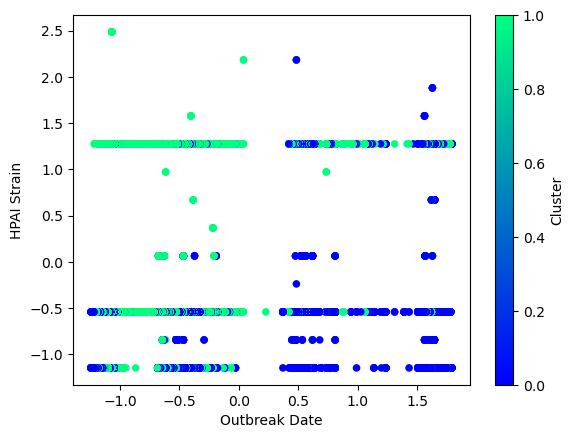

In [45]:
# Plot the data points based on the customer rating
clusters_df.plot.scatter(
    x='Outbreak Date',
    y='HPAI Strain',
    c='Cluster',
    colormap='winter')

In [46]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

In [47]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(clusters_df)
    inertia.append(model.inertia_)

In [48]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,482569.125248
1,2,417202.266559
2,3,380636.318570
3,4,355815.105838
4,5,338622.112109
5,6,324162.395334
6,7,311402.575242
7,8,302276.395433
8,9,295408.118231
9,10,289163.873636


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

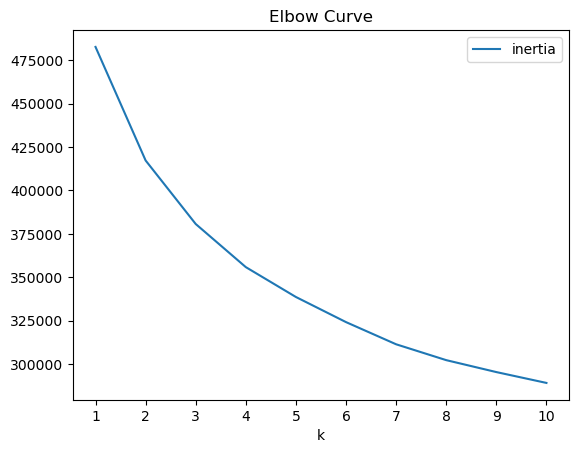

In [49]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [50]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 13.55%
Percentage decrease from k=2 to k=3: 8.76%
Percentage decrease from k=3 to k=4: 6.52%
Percentage decrease from k=4 to k=5: 4.83%
Percentage decrease from k=5 to k=6: 4.27%
Percentage decrease from k=6 to k=7: 3.94%
Percentage decrease from k=7 to k=8: 2.93%
Percentage decrease from k=8 to k=9: 2.27%
Percentage decrease from k=9 to k=10: 2.11%


In [51]:
# Define the model with 2 clusters
model = KMeans(n_clusters=2, n_init='auto', random_state=42)

# Fit the model
model.fit(clusters_df)

# Make predictions
kmeans_predictions = model.predict(clusters_df)


In [52]:
# Fit a AgglomerativeClustering Model with three clusters
agglo_model = AgglomerativeClustering(n_clusters=2)

# Make predictions with the AgglomerativeClustering model
agglo_predictions = agglo_model.fit_predict(clusters_df)

# Previewing the predicted customer classifications for AgglomerativeClustering
agglo_predictions[-10:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
# Fit a Birch Model with three clusters.
birch_model = Birch(n_clusters=2)
birch_model.fit(clusters_df)

# Make predictions with the Birch model
birch_predictions = birch_model.predict(clusters_df)

# Previewing the predicted customer classifications for BIRCH
birch_predictions[-10:]

# Look at the results
print("\nNumber of points in each cluster:")
print(pd.Series(birch_predictions).value_counts())


Number of points in each cluster:
0    36015
1     3379
Name: count, dtype: int64


In [54]:
# Create a copy of the preprocessed data
cluster_predictions_df = clusters_df.copy()

# Add class columns with the labels to the new DataFrame

cluster_predictions_df["kmeans-segments"] = kmeans_predictions
cluster_predictions_df["agglomerative-segments"] = agglo_predictions
cluster_predictions_df["birch-segments"] = birch_predictions
cluster_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].head(3)

,kmeans-segments,agglomerative-segments,birch-segments
0,0,1,0
1,0,1,0
2,0,1,0


<Axes: xlabel='Outbreak Date', ylabel='HPAI Strain'>

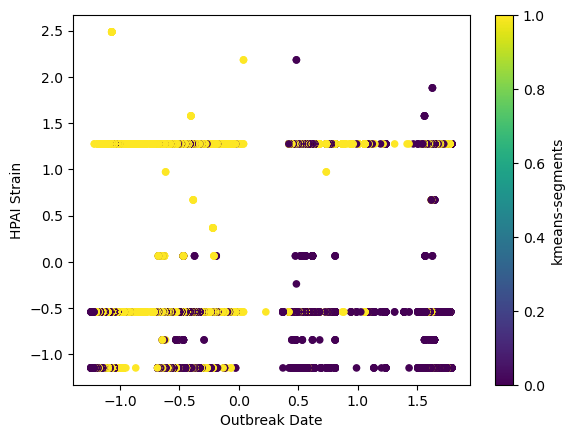

In [55]:
# Plot the kmeans clusters using the limit_bal and age columns. 
cluster_predictions_df.plot.scatter(
    x='Outbreak Date',
    y='HPAI Strain',
    c='kmeans-segments',
    colormap='viridis')

<Axes: xlabel='Outbreak Date', ylabel='HPAI Strain'>

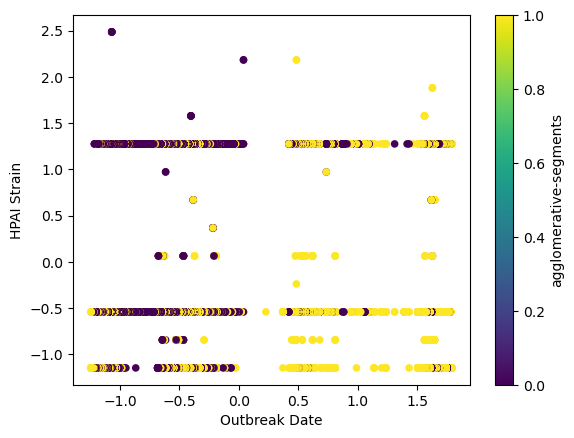

In [56]:
# Plot the agglomerative clusters using the limit_bal and age columns. 
cluster_predictions_df.plot.scatter(
    x='Outbreak Date',
    y='HPAI Strain',
    c='agglomerative-segments',
    colormap='viridis')

<Axes: xlabel='Outbreak Date', ylabel='HPAI Strain'>

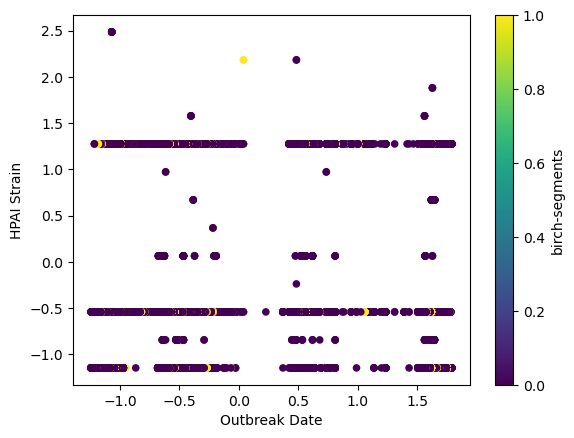

In [57]:
# Plot the birch clusters.

cluster_predictions_df.plot.scatter(
    x='Outbreak Date',
    y='HPAI Strain',
    c='birch-segments',
    colormap='viridis')

In [58]:
# Create a list to store values and the values of k
score_kmeans = []
score_agglomerative = []
score_birch = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

In [ ]:
from sklearn import metrics
# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto',random_state=0)
    k_model.fit(clusters_df)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(clusters_df, labels)    
    score_kmeans.append(score)
    
    # AgglomerativeClustering variance and score
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_predictions = agglo_model.fit_predict(clusters_df)
    labels = agglo_model.labels_
    score = metrics.calinski_harabasz_score(clusters_df, labels)    
    score_agglomerative.append(score)    
    
    # Birch variance and score
    birch_model = Birch(n_clusters=i)
    birch_model.fit(clusters_df)
    labels = birch_model.labels_
    score = metrics.calinski_harabasz_score(clusters_df, labels)    
    score_birch.append(score)

In [ ]:
# Display the scores. 
display(score_kmeans)
display(score_agglomerative)
display(score_birch)

[205097.56168888215,
 335612.16117434186,
 1334917.5999716562,
 1501747.0288668093,
 1383141.360898464,
 1320066.0376516955,
 1492335.7617353657,
 1665885.0113285019,
 1832717.6745230104]

[205097.42833519037,
 330433.79912651546,
 1250338.1279690708,
 1361841.3715605703,
 1555290.0259740169,
 1529111.1380952962,
 1583665.3868535478,
 1671146.2284670023,
 1819727.4253854633]

[205097.42833519037,
 330433.79912651546,
 1250338.1279690708,
 1361841.3715605703,
 1555290.0259740169,
 1518238.7150409517,
 1549965.612255737,
 1721186.1157898866,
 1875716.7202549642]